In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from collections import Counter
from matplotlib import rcParams


In [2]:
hrd_train = pd.read_csv('hrd_train.csv')
hrd_test = pd.read_csv('aug_test.csv')

# Statistical Analysis for HRD Data Set¶

In [3]:
hrd_train.set_index('Unnamed: 0', inplace=True)
hrd_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
Unnamed: 0,,,,,,,,,,,,
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,4,44,0.0


In [4]:
hrd_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
hrd_train['gender'].value_counts()

Male      17729
Female     1238
Other       191
Name: gender, dtype: int64

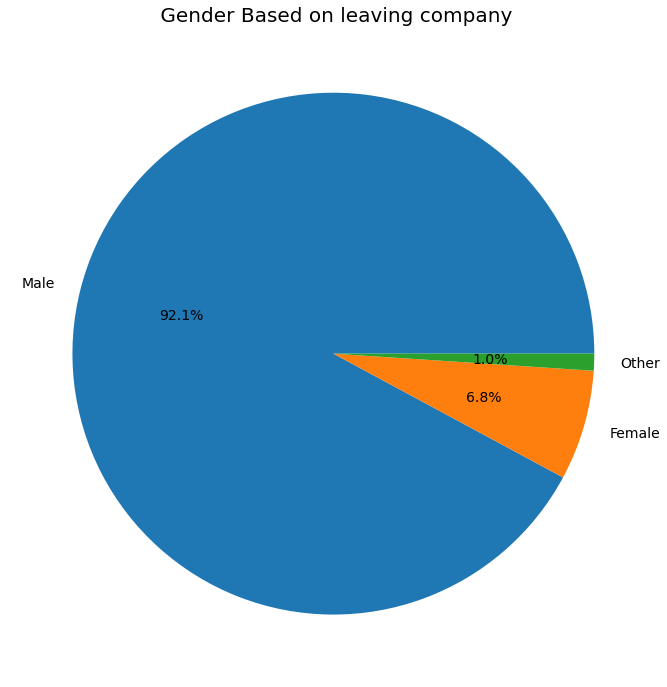

In [6]:
gender = hrd_train[hrd_train['target'] == 1]['gender']
temp = gender.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(20,12))
plt.pie(x = temp, labels = labels, autopct="%.1f%%", textprops={'fontsize': 14})
plt.title(' Gender Based on leaving company', fontsize=20)
plt.savefig('Gender Based.png')

### We can see that male have more tendency to leave and searching for change job, this happend because the data distribution is biased to male. Since male more common in this dataset. 

In [7]:
hrd_train['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

In [8]:
city_frequency = list()
unique_cities = hrd_train['city'].unique()
for city_id, city in enumerate(unique_cities):
    temp = hrd_train[(hrd_train['city'] == city) & (hrd_train['target'] == 1.0)]
    frequency = temp.shape[0]
    city_frequency.append([city, frequency])
city_data = pd.DataFrame(city_frequency, columns = ['city_name', 'frequency'])
sorted_city_frequency = city_data.sort_values(by = 'frequency', ascending = False)

Text(0.5, 1.0, 'Top 5 city with frequent job change')

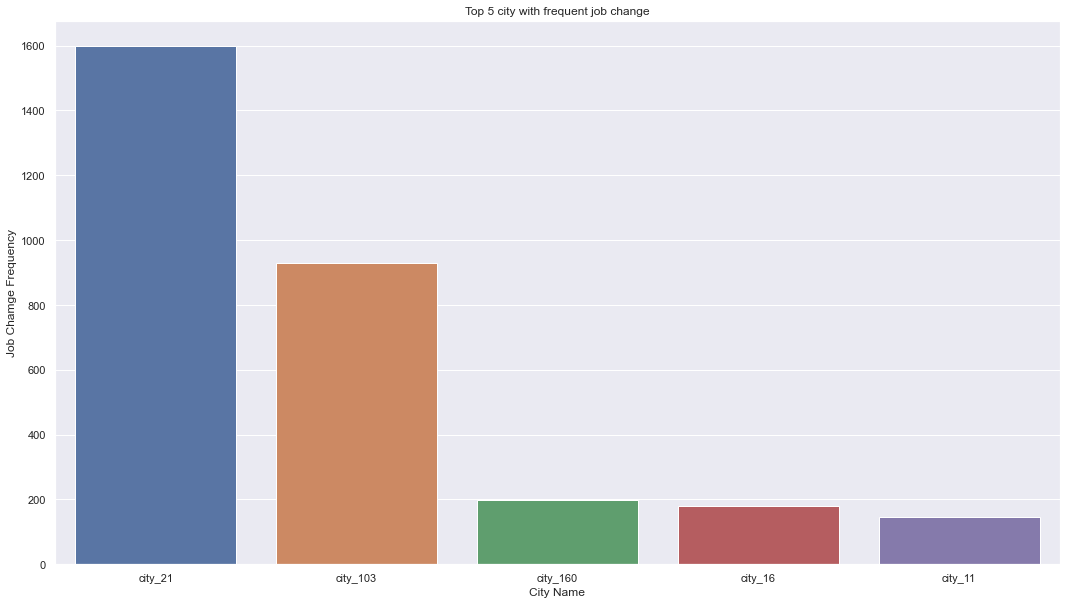

In [9]:
top = 5
top_5 = sorted_city_frequency.iloc[:top, :]
plt.figure(figsize=(18,10))
sns.set_theme(style="darkgrid")
sns.barplot(x = 'city_name', y='frequency', data = top_5)
plt.xlabel('City Name')
plt.ylabel('Job Chamge Frequency')
plt.title('Top 5 city with frequent job change')

### in this we can see that people from city 21 is the most frequent to make job change 

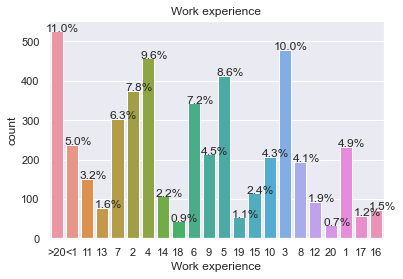

In [10]:
ax = sns.countplot(x="experience",data=hrd_train[hrd_train['target']==1])
total_1 =float(len(hrd_train[hrd_train['target']==1]))
plt.title("Work experience")
plt.xlabel("Work experience")
rcParams['figure.figsize'] = 11.7,8.27
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig('Work Experience.png')
plt.show()

### People with experience 2,3,4,5 and >20 are mor likely to look for job change, this may happend because they looking for new opportunity or challange

In [11]:
hrd_train['education_level'].value_counts()

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

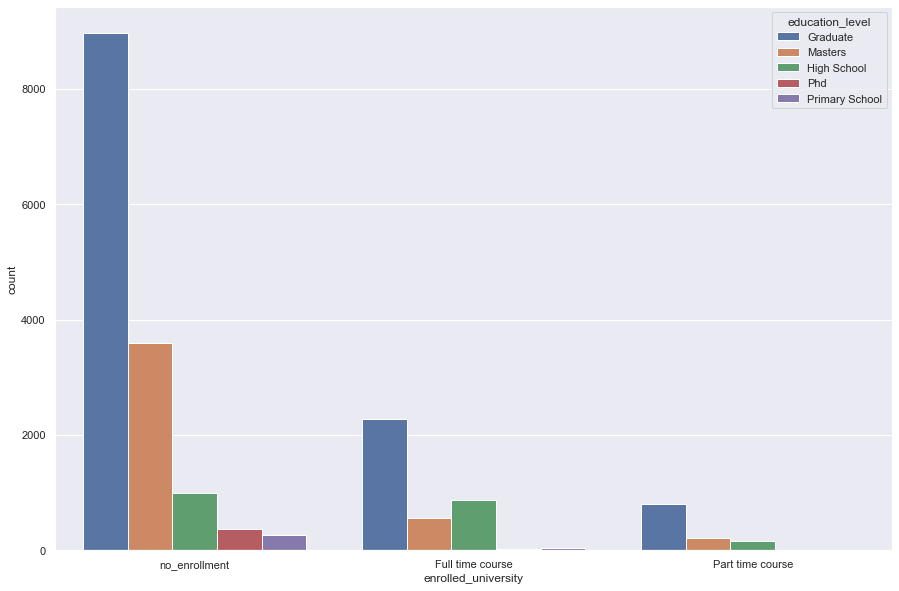

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
sns.countplot(x='enrolled_university', hue='education_level', data=hrd_train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig('Educational on University.png')
plt.show()

### based on chart above we can see that based on education level, the most people who are not taking course are gradute and poeple who taking full time and part time course are graduate, this happende becasue they may try to switch career or try to rise their pay check

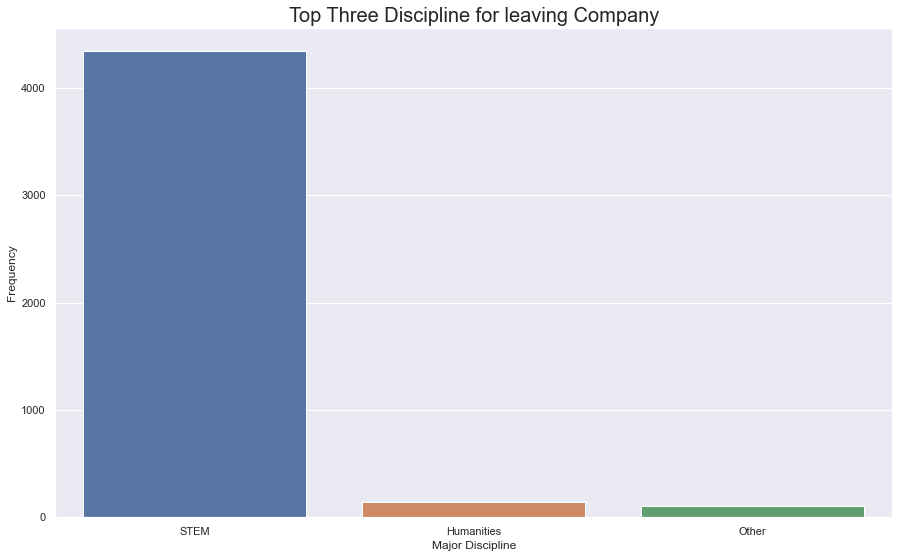

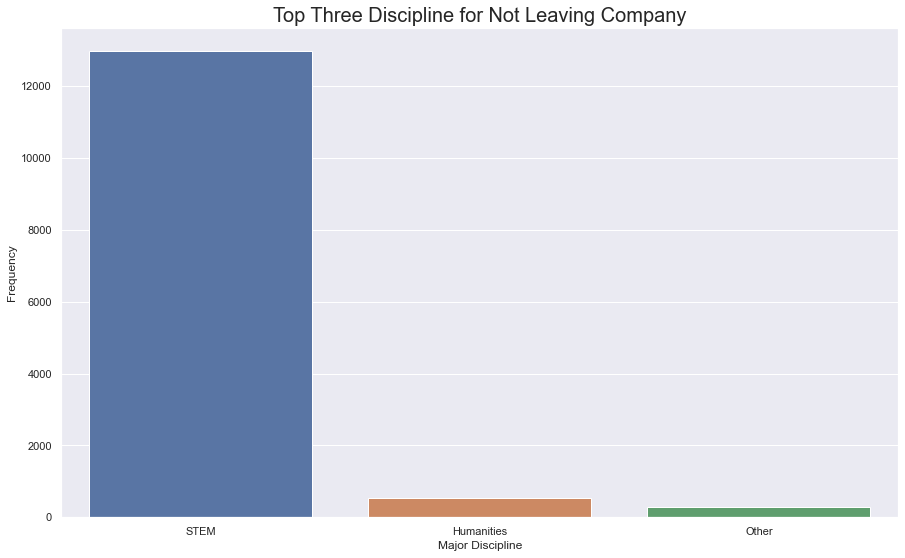

In [13]:
title = ['Top Three Discipline for leaving Company', 'Top Three Discipline for Not Leaving Company']
for index, target in enumerate(hrd_train['target'].unique()):
    major_discipline = hrd_train[hrd_train['target'] == target]['major_discipline']
    temp = major_discipline.value_counts().to_frame()
    temp.reset_index(level=[0], inplace= True)
    top_3 = temp.iloc[:3,:]
    bar, ax = plt.subplots(figsize=(15,9))
    sns.barplot(x = 'index', y = 'major_discipline', data = top_3)
    plt.xlabel('Major Discipline')
    plt.ylabel('Frequency')
    plt.title(title[index], fontsize=20)
    plt.savefig('Top Three Dicipline for leaving company.png')
    plt.show()

### Since data science relies heavily on math and science. its common sense that STEM is the top one, since STEM is an acronym for the fields of science, technology, engineering and math.

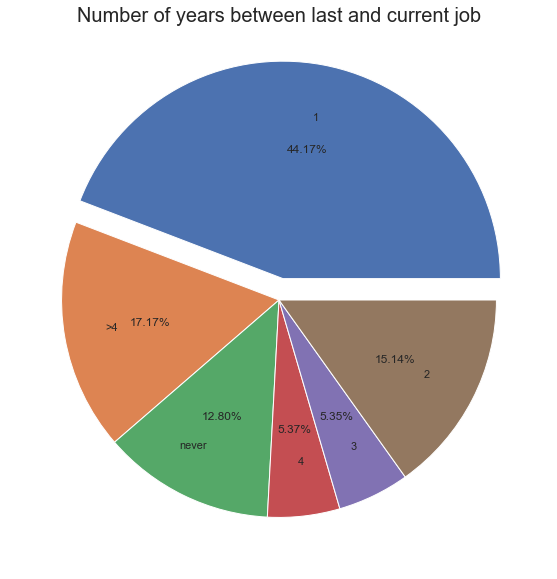

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
count = Counter(hrd_train['last_new_job'])
plt.pie(count.values(), labels=count.keys(), labeldistance=0.75, autopct=lambda p:f'{p:.2f}%',
       explode=[0.1]+[0]*5, shadow=False)
plt.title('Number of years between last and current job', fontsize=20)
plt.savefig('Number of years between last and current job.png')
plt.show()

### We can see that poeple who looking for job change is have less than 1 year experience, this maybe happening because they find it uncomfortable to working on that company, so they try to find another company

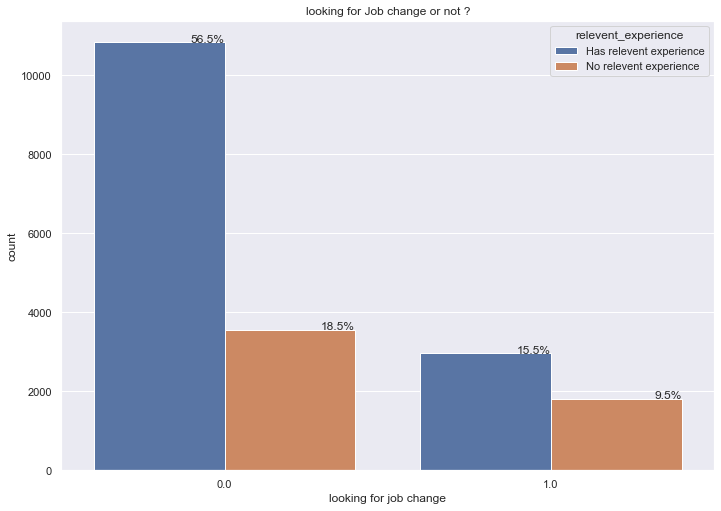

In [15]:
ax = sns.countplot(x="target",data=hrd_train, hue="relevent_experience")
total =float(len(hrd_train))

plt.title("looking for Job change or not ?")
plt.xlabel("looking for job change")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig('Relevent experience looking for Job change or not.png')
plt.show()

### Out of those who looks for job change, 15.5 % have relevent experience. this may happend a lot of people are who have experience more confident with their skills

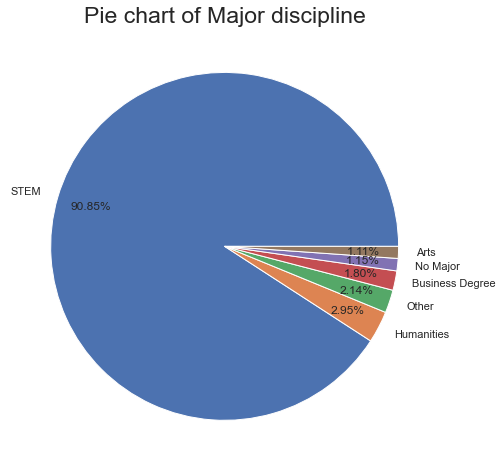

In [16]:
major_discipline = hrd_train[hrd_train['target'] == 1]['major_discipline']
values = major_discipline.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('Pie chart of Major discipline', fontsize=23)
plt.savefig('Major Discipline.png')
plt.show()

### STEM Major take the majority of the pie chart, this probably happend because STEM is the acronym of Science, technology, engineering, and mathematics and Data Science is evolve around Mathematic and Science

In [17]:
hrd_train.to_csv('hrd_for_Modelling.csv')